# Functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from Spike_Generation import NL

importing Jupyter notebook from Spike_Generation.ipynb


In [4]:
#This function deals with differentiation of angle within [-pi,pi).
#It will fail if angle array x change too fast.
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

![title](D:\GoogleDrive\retina\Chou's data\20210504\FIG\cSTA\fitNGD2Lparameter.tiff)

In [8]:
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513'
annots = loadmat(exp_folder+'\\merge\\merge_0224_cSTA_wf_3min_Q100_re', squeeze_me = True)
x = annots['bin_pos']
x = x-np.mean(x)
dt = 1/60
for cn in range(60):
    spike = annots['reconstruct_spikes'][cn]
    rstate, _ = np.histogram(spike, np.arange(len(x)+1)*dt)
    if sum(rstate) <= 100: continue
    cSTA = np.correlate(x , rstate, 'same')/ np.correlate(np.ones_like(x), rstate, 'same')
    cSTA = cSTA[int(len(cSTA)/2):int(len(cSTA)/2-1/dt)-1:-1]
    taxis = -np.arange(len(cSTA))*dt

    def NGD2L_TK_AS(T, epsilon, gamma, omegastar, deltastar, tau, Dmp):
        dt = np.mean(np.diff(T))
        dt = dt/50
        T = np.arange(0, T[-1]+dt, dt)
        x = T/tau /tau *np.exp(-T/tau)*dt

        Kw = -Dmp*( 1/np.cos(deltastar)*np.exp(-T*epsilon)*np.cos(T*omegastar+deltastar) -np.exp(-gamma*T) )
        w = np.convolve(x, Kw, 'full')[:len(T):50]*dt
        return w/(dt)

    epsilon = 10
    omegastar = 30
    deltastar = 0
    gamma = 1000
    tau = 0.03
    Bmp = 20
    Dmp = 1
    popt,pcov = curve_fit(NGD2L_TK_AS, np.abs(taxis) , cSTA, p0=[epsilon, gamma, omegastar, deltastar, tau,  Dmp],
                          bounds = ([0     , 0     , 0     ,-np.pi, 0     , 0     ],
                                    [np.inf, np.inf, np.inf, np.pi, 0.6   , np.inf]) )
    [tau, gamma, omegastar, deltastar, tau_y,  Dmp] = popt
    fit_cSTA = NGD2L_TK_AS(np.abs(taxis), *popt).copy()

    wn = np.random.randn(50001)
    output = np.convolve(wn*2+6.5, fit_cSTA, 'full')[:50001]*dt
    print(np.mean(output))

-0.8632181905421585
-0.5430428030390791
-0.8045993667332052
-0.8279319679888142
-0.946041885492333
-0.10940329122886973
-0.16046811015911144
-0.610164205832195
-0.2790733984618137
-0.37757966466596493
-0.6968776942748752
-0.7076987240457191
-0.7717429702295785
-0.8050782146200761
-0.7081818472583137
-0.49521887951176924
-0.5605582593033323
0.4420403056829477
-1.3807112119823404
-1.3662577981956503
-1.1358111580431975
-0.9556685925241023
-1.5624804421188063
-0.6976256002791865
-0.1137549762483226
-1.170600961595701
-0.5959343516218912
-0.4515265396841673
-0.3340856326223629
-0.604568707085733
-1.1049271093711481
-0.6272525811269248
-0.12006302570338181
-0.867541043451103


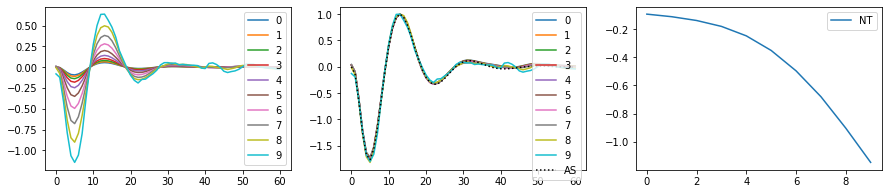

In [49]:
c = 0
mag = []
fig, ax = plt.subplots(1, 3)
for theta in np.linspace(min(output), np.mean(output)+2*np.std(output), 10):
    wnTK = np.correlate(NL(output,theta), wn,  'same') / np.correlate(NL(output,theta), np.ones(50001),  'same')
    wnTK = wnTK[25000:25000+len(fit_cSTA)]
    ax[0].plot(wnTK, label = str(c))
    ax[1].plot(wnTK/max(wnTK), label = str(c))
    c+=1
    mag.append(min(wnTK))
ax[1].plot(fit_cSTA/max(fit_cSTA), 'k:', label = 'AS')
ax[2].plot(mag, label='NT')
for a in ax:
    a.legend()
fig.set_size_inches(15,3)

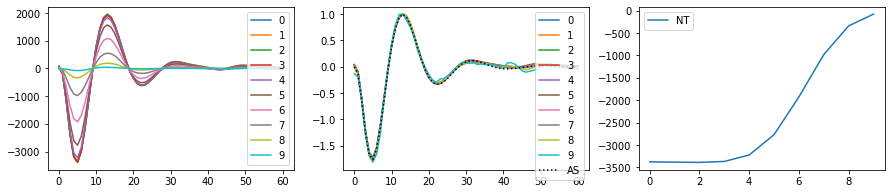

In [50]:
c = 0
mag = []
fig, ax = plt.subplots(1, 3)
for theta in np.linspace(min(output), np.mean(output)+2*np.std(output), 10):
    wnTK = np.correlate(NL(output,theta), wn,  'same')
    wnTK = wnTK[25000:25000+len(fit_cSTA)]
    ax[0].plot(wnTK, label = str(c))
    ax[1].plot(wnTK/max(wnTK), label = str(c))
    c+=1
    mag.append(min(wnTK))
ax[1].plot(fit_cSTA/max(fit_cSTA), 'k:', label = 'AS')
ax[2].plot(mag, label='NT')
for a in ax:
    a.legend()
fig.set_size_inches(15,3)